In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import mode

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

### Problem Statement

In [ ]:
# To predict the price of house

### Data Gathering and Data Validation

In [2]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### EDA (Exploratoy data Analysis)

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

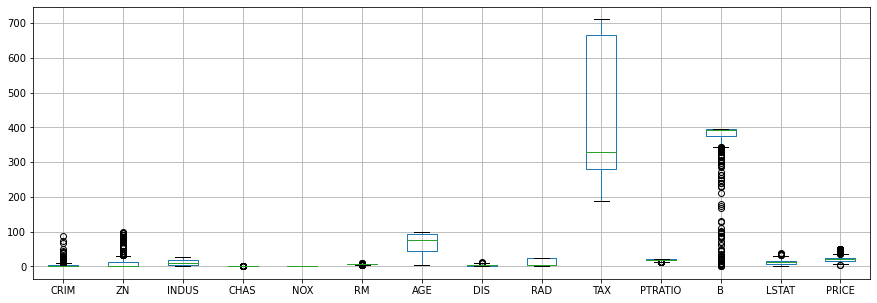

In [6]:
boston_df.boxplot(figsize=(15,5))

In [7]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

##### 1. CRIM

<AxesSubplot:xlabel='CRIM'>

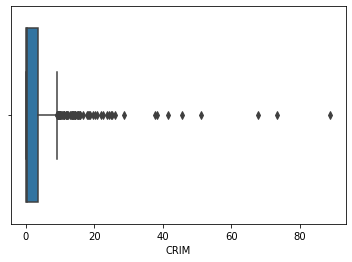

In [8]:
sns.boxplot(boston_df['CRIM'])

In [9]:
boston_df['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [10]:
q1 = 0.082045
q3 = 3.677083
iqr = q3 - q1
lower_tail = q1 - (1.5*iqr)
upper_tail = q3 + (1.5*iqr)

In [17]:
mean = boston_df['CRIM'].loc[(boston_df['CRIM'] <= upper_tail)].mean()
mean

1.1983409999999992

In [18]:
boston_df['CRIM'].loc[(boston_df['CRIM'] > upper_tail)] = mean

<AxesSubplot:xlabel='CRIM'>

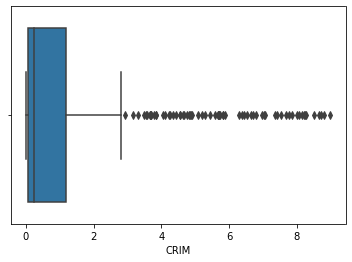

In [19]:
sns.boxplot(boston_df['CRIM'])

### 2. ZN

<AxesSubplot:xlabel='ZN'>

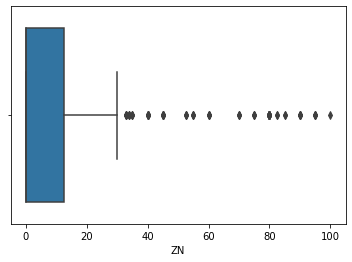

In [20]:
sns.boxplot(boston_df['ZN'])

In [21]:
boston_df['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

In [22]:
q1 = 0.00
q3 = 12.50
iqr = q3 - q1
lower_tail = q1 - (1.5*iqr)
upper_tail = q3 + (1.5*iqr)

In [23]:
mean = boston_df['ZN'].loc[(boston_df['ZN'] <= upper_tail)].mean()
mean

3.192922374429224

In [24]:
boston_df['ZN'].loc[(boston_df['ZN'] > upper_tail)] = mean

<AxesSubplot:xlabel='ZN'>

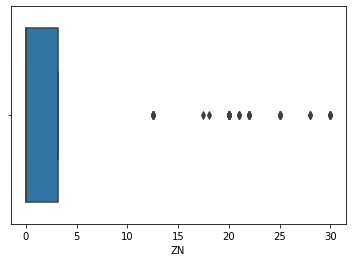

In [25]:
sns.boxplot(boston_df['ZN'])

### train test split

In [26]:
x = boston_df.drop(['PRICE'],axis=1)
y = boston_df['PRICE']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=45)

## Model training and Model selection

#### 1. Linear regression

In [27]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [28]:
# training
y_pred_train = linear_model.predict(x_train)
mae = mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error : ',mae)
mse = mean_squared_error(y_train,y_pred_train)
print('Mean Sqaured Error : ',mse)
r2_value = r2_score(y_train,y_pred_train)
print('R2 score : ',r2_value)
adjr2 = 1-(((1-r2_value)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2 score : ',adjr2)

Mean Absolute Error :  3.24193280596545
Mean Sqaured Error :  21.978293866650816
R2 score :  0.7224608295215036
Adjusted R2 score :  0.7118490377090905


In [29]:
# testing
y_pred_test = linear_model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error : ',mae)
mse = mean_squared_error(y_test,y_pred_test)
print('Mean Sqaured Error : ',mse)
r2_value = r2_score(y_test,y_pred_test)
print('R2 score : ',r2_value)
adjr2 = 1-(((1-r2_value)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 score : ',adjr2)

Mean Absolute Error :  3.624432277060416
Mean Sqaured Error :  25.26188100253471
R2 score :  0.7384528646341442
Adjusted R2 score :  0.7138143663750418


#### 2. KNN regression

In [37]:
normal = MinMaxScaler()
array = normal.fit_transform(x_train)
x_normal = pd.DataFrame(array,columns=x_train.columns)
# x_normal

In [38]:
knn_model = KNeighborsRegressor()  # k=5,p=2
knn_model.fit(x_normal,y_train)

KNeighborsRegressor()

In [39]:
# training
y_pred_train = knn_model.predict(x_train)
mae = mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error : ',mae)
mse = mean_squared_error(y_train,y_pred_train)
print('Mean Sqaured Error : ',mse)
r2_value = r2_score(y_train,y_pred_train)
print('R2 score : ',r2_value)
adjr2 = 1-(((1-r2_value)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2 score : ',adjr2)

Mean Absolute Error :  10.383050847457625
Mean Sqaured Error :  181.54371073446325
R2 score :  -1.2925114746638466
Adjusted R2 score :  -1.3801663251656997


In [40]:
# testing
y_pred_test = knn_model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error : ',mae)
mse = mean_squared_error(y_test,y_pred_test)
print('Mean Sqaured Error : ',mse)
r2_value = r2_score(y_test,y_pred_test)
print('R2 score : ',r2_value)
adjr2 = 1-(((1-r2_value)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 score : ',adjr2)

Mean Absolute Error :  10.716184210526317
Mean Sqaured Error :  200.1251447368421
R2 score :  -1.0719818257138671
Adjusted R2 score :  -1.2671685194405358


In [41]:
import pickle
import json

In [42]:
with open('Linear_model.pkl','wb') as file:
    pickle.dump(linear_model,file)

In [43]:
data = {'columns':list(x_train.columns)}

In [44]:
with open('project_data.json','w') as file:
    json.dump(data,file)